In [1]:
import os
import matplotlib.pyplot as plt
import control as ct
import numpy as np

In [2]:
def model(z,u,k,Fext):
    x1 = z[0]
    x2 = z[1]
    x3 = z[2]
    x4 = z[3]
    
    m1 = 4 #  kg
    m2 = 2 # kg
    b = 126.0 # Ns/m
    
    
    dx1dt = x2
    dx2dt = -(k/m1)*x1 + (k/m1)*x3 - (b/m1)*x2 + u/m1
    dx3dt = x4
    dx4dt =  (k/m2)*x1-(k/m2)*x3 - Fext/m2
    
    return [dx1dt,dx2dt,dx3dt,dx4dt]

In [3]:
def forwardeuler(dx,z,step):
    z = z + step * dx
    return z

In [4]:
def poscont(x1,x2,posr,posrd):
    Kp = 500.0 #N/m
    Kd = 0.49 #Ns/m
    u = Kp*(posr - x1) + Kd*(posrd - x2)
    return u

In [5]:

deltat = 0.0001
tf = 20
ti = 0
n = int(((tf-ti)/deltat)+1)

t = np.linspace(ti,tf,n)
Fext = np.zeros(n)
Fext[11:n] = 0
z  = np.zeros(4)
x1 = np.zeros(n)
x2 = np.zeros(n)
x3 = np.zeros(n)
x4 = np.zeros(n)


k = 5000.0 #N/m

u = 0
posr = np.zeros(n)
posr[11:n] = 0.02 #step input to 2 cm
for i in range(n):
    dx = model(z,u,k,Fext[i])
    dx = np.array(dx)
    z = forwardeuler(dx, z, deltat)
    
    u = poscont(z[0],z[1],posr[i],0)
    x1[i] = z[0]
    x2[i] = z[1]
    x3[i] = z[2]
    x4[i] = z[3]
    

/home/umut/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


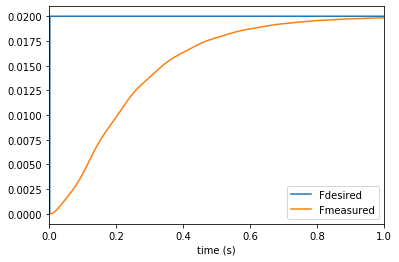

In [6]:
plt.figure(1)
plt.xlabel("time (s)")
plt.xlim(-0.001,1)
plt.plot(t,posr,label= 'Fdesired')
plt.plot(t,x1,label = 'Fmeasured')
plt.legend()